

# Project: IMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset chosen for the research project is **TMDb movie data**. This dataset contains data about films with several variables such as cast, revenue, genres, budget, popularity, ... .

> We are going to to ask the following questions about the data. What kind of properties have the most popular movies? and what actors and directors are the most popular?

In [159]:
# In this cell, we are going to set up import statements for all of the packages we are going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we are going to prepare our dataset to anwser the questions that we are formulated above.

### General Properties

> First of all, we will load our dataset and print out some lines to see the data. We will also see the size of our dataset.

In [160]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movie = pd.read_csv('tmdb-movies.csv')
print('Rows:', df_movie.shape[0],'\nColumns:', df_movie.shape[1])
df_movie.head(3)


Rows: 10866 
Columns: 21


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [161]:
# More important statistics related to the variables
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> With these statistics, we can noticed several things:
- More than 50% of the movies don´t have set budget and revenue. For these reason we don´t use these columns.
- There are movies with runtime set to 0 and others with 900 minutes.

In [162]:
#Datatypes of the variables
df_movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [163]:
#Missing values in the dataset
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> On a sight of our dataset, we can remove several column that we will not use in our analisys. We will also remove missing data.

In [164]:
df_movie.drop(['id', 'imdb_id', 'budget','revenue', 'homepage', 'tagline', 'keywords','production_companies','release_date','overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df_movie.dropna(inplace=True)
print(df_movie.info())
df_movie.head(3);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10732 non-null float64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 838.4+ KB
None


### Data Cleaning 

>Right now, we have a first impression about our dataset and we are going to do data cleaning in several points. For instance, we have three columns (cast, genres, director) with multiples values, but we are to get only the first in all cases. In case of cast we only get the main actor or actress of the film, in the second one we get the main genre and the third the main director.

> Also in this part of the project. We will see the consistency of our date removing duplicate rows, inconsistent data, ... .

In [165]:
# we keep the main actor or actress, the main gerne of the film and the main  director, we are also going to rename this columns
first_data = ["cast","genres",'director']
for c in first_data:
    df_movie[c] = df_movie[c].apply(lambda x: x.split("|")[0])

df_movie.rename(columns={'cast':'main_actor','genres':'main_genre','director':'main_director'}, inplace= True)
 
df_movie.head(5)

,popularity,original_title,main_actor,main_director,runtime,main_genre,vote_count,vote_average,release_year
0,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,5562,6.5,2015
1,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,6185,7.1,2015
2,13.112507,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,2480,6.3,2015
3,11.173104,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,5292,7.5,2015
4,9.335014,Furious 7,Vin Diesel,James Wan,137,Action,2947,7.3,2015


In [166]:
# remove duplicated rows
print('Duplicated rows: ', sum(df_movie.duplicated()))
df_movie.drop_duplicates(inplace=True)


Duplicated rows:  1


>Now we can see an histogram of all de numeric values in which we can see the next insights.
  - Then number of films have been increasing exponentially with the past of the years.
  - Most of the films have a popularity about 0.
  - The vote averege is close to a normal distribution. 

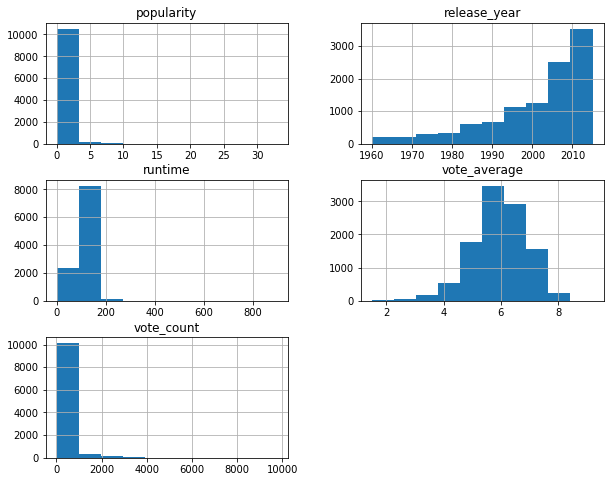

In [167]:
df_movie.hist(figsize=(10,8));

In [168]:
#only keep films that have a runtime between 60 and 200 minutes, once we see that films we delete are not representative.
runtime_bound=df_movie.query('runtime < 60 or runtime > 200')['runtime'].count()
print('These columns represent {} rows which are not representative for the whole dataset.'.format(runtime_bound))
df_movie = df_movie.query('runtime > 60 and runtime < 200')


These columns represent 338 rows which are not representative for the whole dataset.


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: What kind of properties have the most popular movies?

>First of all, we are going to compare the different variables with the popularity and vote average.


In [169]:
#Function to remove "_" and title strings
def string_change(variable:str):
    result = variable.title().replace('_'," ")
    return result
    

#Function ti print a scatter plot
def scatter(x_variable,y_variable):
    graph = df_movie.plot(x=x_variable, y=y_variable, kind= 'scatter', title='{} Vs {}'.format(string_change(x_variable),string_change(y_variable)));
    return graph;


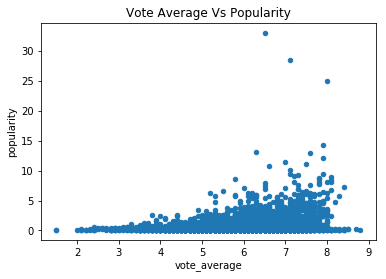

In [170]:
scatter('vote_average','popularity');

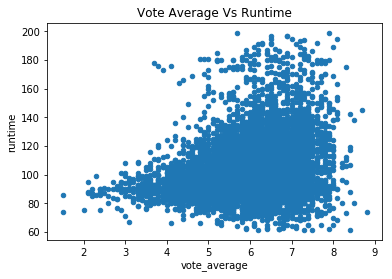

In [171]:
scatter('vote_average','runtime');

In [172]:
print('Runtime of films with highest vote average:',round(df_movie.query('vote_average > 7')['runtime'].mean(),2))

Runtime of films with highest vote average: 111.71


In [173]:
#Function to plot a variable to genre
def genre_plot(variable:str):
    genre = df_movie.groupby('main_genre')[variable].mean().sort_values(ascending=False)
    print(genre)
    plot = genre.plot(kind='bar', figsize=(10,5), title = '{} by Genre'.format(string_change(variable)));
    return plot

main_genre
Documentary        6.896328
Music              6.525000
History            6.345238
Animation          6.266783
Crime              6.212202
Drama              6.190641
War                6.155357
Romance            6.114773
Western            6.080952
Adventure          6.018761
Mystery            5.895968
Family             5.881102
Comedy             5.865517
Science Fiction    5.843455
Fantasy            5.779693
Action             5.730561
Foreign            5.687500
TV Movie           5.662687
Thriller           5.641478
Horror             5.312514
Name: vote_average, dtype: float64


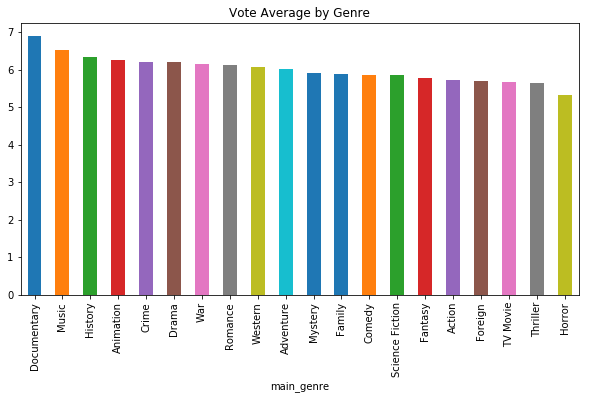

In [174]:
genre_plot('vote_average');

> The films which have better rate, last about 2 hours and the main genres of this films are Documentary, Music, History and Animation.

main_genre
Adventure          1.234009
Science Fiction    1.178170
Animation          0.971267
Fantasy            0.884037
Action             0.844931
History            0.791854
War                0.783809
Family             0.775684
Romance            0.732495
Crime              0.697459
Western            0.690646
Thriller           0.677834
Mystery            0.601536
Drama              0.557403
Comedy             0.546042
Music              0.475263
Horror             0.472770
TV Movie           0.239546
Documentary        0.185319
Foreign            0.178917
Name: popularity, dtype: float64


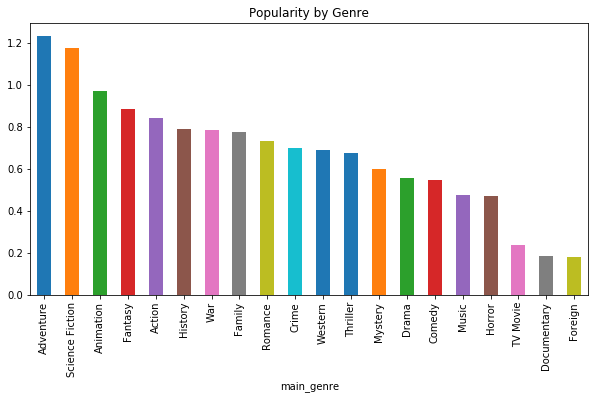

In [175]:
genre_plot('popularity');

> But if we do the same with the variable of popularity we can see how genres that are well vote aren´t popular like Documentary or Music, instead of these the more popular genres are Adventure and Science Fiction.
We can sumarize this as, one thing is what people see and other what people vote.

### Question 2  what actors and directors are the most popular?

> First, we can see the actors who have participate in films more time as the main actor them, also we are going to do the same with directors.

In [176]:
def more_movies(variable:str, rows=0 , title=0 ):
    """This function return an aggregations of all movies by a varible
    Input: variable - variable of the aggregation
           rows - rows to print (0 default value, return all rows)
           title - return title if it is 1 (0 default it do not return title)"""
    main_data=df_movie.groupby(variable).agg({variable:'size', 'popularity':'mean'}).rename(columns={variable:'Films'}).sort_values(by='Films',ascending=False)
    if title==1:
        print('{} with more movies'.format(string_change(variable)))
    
    if rows==0:
        result=main_data
    else:
        result=main_data.head(rows)
    return result

In [177]:
more_movies('main_actor',10,1)

Main Actor with more movies


,Films,popularity
main_actor,,
Nicolas Cage,50,0.996495
Robert De Niro,40,0.954455
Bruce Willis,39,1.279573
Clint Eastwood,38,0.643061
Johnny Depp,36,1.688349
Sylvester Stallone,36,1.185090
Steven Seagal,35,0.390328
Jean-Claude Van Damme,35,0.553295
Tom Hanks,34,1.706897


In [178]:
print('More popular Actors')
print(more_movies('main_actor').query('Films>5').sort_values(by='popularity',ascending=False).head(10))

More popular Actors
                     Films  popularity
main_actor                            
Tom Hardy               10    3.784640
Daniel Radcliffe        14    3.626552
Jennifer Lawrence        9    3.242708
Chris Evans             10    2.833819
Leonardo DiCaprio       18    2.689024
Matthew McConaughey     15    2.600903
Robert Downey Jr.       16    2.596139
Christian Bale          18    2.368288
Bradley Cooper          10    2.185829
Vin Diesel              12    2.183301


In [179]:
#Function mean of popularity and plot
def mean_plot(variable:str):
    lt_10=round(more_movies(variable).query('Films < 10').popularity.mean(),2)
    gt_10=round(more_movies(variable).query('Films >= 10').popularity.mean(),2)
    print('{}´s popularity with less than 10 films: '.format(string_change(variable)),lt_10)
    print('{}´s popularity with greather or equal than 10 films: '.format(string_change(variable)),gt_10)
    plot=more_movies(variable).query('Films >= 10').plot(x='Films',y='popularity', kind='scatter', title='{}: Nº of films vs popularity(more than 10 films)'.format(string_change(variable)))
    return plot

Main Actor´s popularity with less than 10 films:  0.43
Main Actor´s popularity with greather or equal than 10 films:  0.95


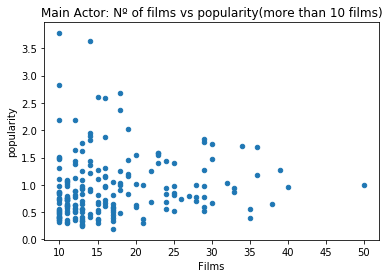

In [180]:
mean_plot('main_actor');

>On a sight the actor with more movies don´t have to be more popular, although the mayority of them are above the mean.

In [181]:
more_movies('main_director',10)

,Films,popularity
main_director,,
Woody Allen,46,0.559087
Clint Eastwood,34,0.830037
Steven Spielberg,29,1.875138
Martin Scorsese,25,1.286499
Ridley Scott,23,2.009294
Ron Howard,22,1.295499
Steven Soderbergh,22,0.945138
Joel Schumacher,21,0.768102
Brian De Palma,20,0.861027


In [182]:
print('More popular directors')
print(more_movies('main_director').query('Films>5').sort_values(by='popularity',ascending=False).head(10))

More popular directors
                   Films  popularity
main_director                       
Christopher Nolan      9    6.865185
Quentin Tarantino      9    5.093924
Francis Lawrence       6    4.437604
George Miller          9    4.149563
George Lucas           6    3.910306
Peter Jackson         12    3.495454
David Fincher         10    3.447978
James Cameron          9    3.202686
Jon Favreau            7    2.729296
Sam Mendes             7    2.673456


Main Director´s popularity with less than 10 films:  0.51
Main Director´s popularity with greather or equal than 10 films:  0.85


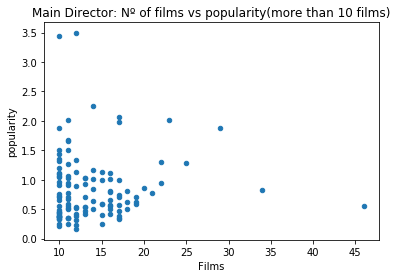

In [183]:
mean_plot('main_director');

>In the case of directors are similar to the the case of actors, besides women don't appears in these lists(only Jennifer Lawrence in actor´s list). Which means that women haven´t have a main role in the movies so far.

> Now we will add the movie´s genre to the analisys of these variables.

In [184]:
director_genre=df_movie.groupby(['main_director','main_genre']).agg({'main_director':'size', 'popularity':'mean'}).rename(columns={'main_director':'Films'}).sort_values(by='Films',ascending=False).reset_index()
print('Directors & Genres with more films')
print(director_genre.head(10))


Directors & Genres with more films
       main_director main_genre  Films  popularity
0        Woody Allen     Comedy     28    0.540958
1    Martin Scorsese      Drama     16    1.276344
2      Gerald Thomas     Comedy     12    0.158687
3  Steven Soderbergh      Drama     12    0.779350
4     Stephen Frears      Drama     12    0.347140
5         Rob Reiner     Comedy     12    0.771106
6      Blake Edwards     Comedy     12    0.598763
7         Wes Craven     Horror     12    0.620847
8     Clint Eastwood      Drama     11    0.848778
9         Mel Brooks     Comedy     11    0.775615


         main_director main_genre  Films  popularity
553  Christopher Nolan     Action      3    7.118582
526       George Lucas  Adventure      3    6.230759
96       Peter Jackson  Adventure      6    6.147223
569     Gore Verbinski  Adventure      3    5.345150
478     Chris Columbus  Adventure      3    5.304008
267        David Yates  Adventure      4    5.126634
218      James Cameron     Action      4    4.923096
419      David Fincher      Drama      3    4.294623
440          Brad Bird     Action      3    3.918095
217  Quentin Tarantino     Action      4    3.806049


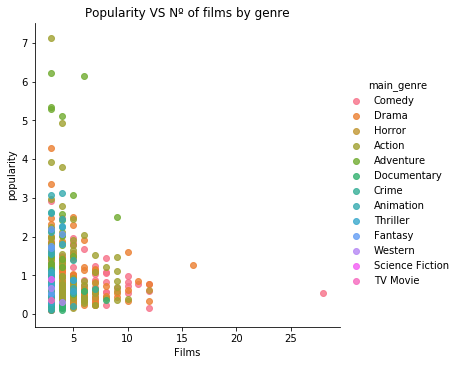

In [185]:
director_genre=director_genre.query('Films >= 3');

print(director_genre.query('popularity > 2').sort_values(by=['popularity'],ascending=False).head(10))

f=sns.lmplot( x="Films", y="popularity", data=director_genre, fit_reg=False, hue='main_genre', legend=True);
f.ax.set_title('Popularity VS Nº of films by genre');

> The most popular director are:
- Christopher Nolan    
- Quentin Tarantino   
- Francis Lawrence 

> Although there are other directors who are popular by their sagas like:
- Peter Jackson
- George Lucas

In [186]:
actor_genres=df_movie.groupby(['main_actor','main_genre']).agg({'main_actor':'size', 'popularity':'mean'}).rename(columns={'main_actor':'Films'}).sort_values(by='Films',ascending=False).reset_index()
print('Actors & Genres with more films')
print(actor_genres.head(10))

Actors & Genres with more films
              main_actor main_genre  Films  popularity
0          Steven Seagal     Action     31    0.412822
1     Sylvester Stallone     Action     26    1.203434
2  Jean-Claude Van Damme     Action     25    0.558532
3            Woody Allen     Comedy     23    0.478074
4           Adam Sandler     Comedy     22    1.092821
5         Robin Williams     Comedy     21    0.687933
6           Steve Martin     Comedy     20    0.528693
7           Bruce Willis     Action     20    1.416418
8         Clint Eastwood     Action     17    0.614869
9  Arnold Schwarzenegger     Action     16    1.788285


Most popular actors by genre
   index        main_actor main_genre  Films  popularity
0     70  Daniel Radcliffe  Adventure      8    5.788532
1    163       Johnny Depp  Adventure      6    4.264983
2     66      Keanu Reeves     Action      8    3.281113
3     83        Tom Cruise     Action      7    2.994068
4    231    Christian Bale      Drama      5    2.987059
5    144     Harrison Ford     Action      6    2.559797
6    240        Will Smith     Action      5    2.478129
7     98        Vin Diesel     Action      7    2.436027
8    247    Michael J. Fox  Adventure      5    2.433776
9     87     Harrison Ford  Adventure      7    2.378329


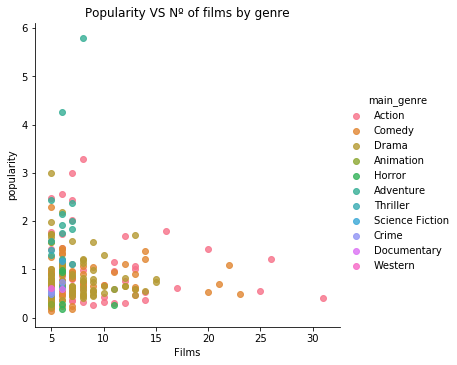

In [187]:
actor_genres=actor_genres.query('Films >= 5');
print('Most popular actors by genre')
print(actor_genres.query('popularity > 2').sort_values(by='popularity',ascending=False).head(10).reset_index())

g=sns.lmplot( x="Films", y="popularity", data=actor_genres, fit_reg=False, hue='main_genre', legend=True)
g.ax.set_title('Popularity VS Nº of films by genre');


> We are going to examine the film in which participate the top 3 actors as the main actor.

In [188]:
#Function to print actor´s movies
def actor_movies(name: str):
    print(name + ' movies')
    movies = df_movie.query('main_actor == "{}"'.format(name)).sort_values(by='popularity', ascending =False)
    return movies  

In [189]:
actor_movies("Tom Hardy")

Tom Hardy movies


,popularity,original_title,main_actor,main_director,runtime,main_genre,vote_count,vote_average,release_year
1,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,6185,7.1,2015
71,2.281350,Legend,Tom Hardy,Brian Helgeland,131,Crime,619,6.7,2015
704,1.957672,The Drop,Tom Hardy,MichaÃ«l R. Roskam,106,Drama,583,6.6,2014
89,1.956320,Child 44,Tom Hardy,Daniel Espinosa,137,Crime,341,5.9,2015
3433,1.246852,Warrior,Tom Hardy,Gavin O'Connor,140,Action,768,7.6,2011
3013,0.632341,Bronson,Tom Hardy,Nicolas Winding Refn,92,Drama,375,6.9,2008
854,0.602735,Locke,Tom Hardy,Steven Knight,85,Drama,480,6.8,2014
7563,0.474364,Stuart: A Life Backwards,Tom Hardy,David Attwood,92,Drama,17,7.1,2007
6820,0.171168,Minotaur,Tom Hardy,Jonathan English,93,Horror,15,3.4,2006
1738,0.103661,Wuthering Heights,Tom Hardy,Coky Giedroyc,142,Drama,21,7.4,2009


In [190]:
actor_movies("Daniel Radcliffe")

Daniel Radcliffe movies


,popularity,original_title,main_actor,main_director,runtime,main_genre,vote_count,vote_average,release_year
2634,8.021423,Harry Potter and the Philosopher's Stone,Daniel Radcliffe,Chris Columbus,152,Adventure,4265,7.2,2001
3912,6.012584,Harry Potter and the Chamber of Secrets,Daniel Radcliffe,Chris Columbus,161,Adventure,3458,7.2,2002
6190,5.939927,Harry Potter and the Goblet of Fire,Daniel Radcliffe,Mike Newell,157,Adventure,3406,7.3,2005
6962,5.827781,Harry Potter and the Prisoner of Azkaban,Daniel Radcliffe,Alfonso CuarÃ³n,141,Adventure,3550,7.4,2004
3374,5.711315,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe,David Yates,130,Adventure,3750,7.7,2011
1389,5.076472,Harry Potter and the Half-Blood Prince,Daniel Radcliffe,David Yates,153,Adventure,3220,7.3,2009
7388,4.878162,Harry Potter and the Order of the Phoenix,Daniel Radcliffe,David Yates,138,Adventure,3382,7.2,2007
1923,4.840588,Harry Potter and the Deathly Hallows: Part 1,Daniel Radcliffe,David Yates,146,Adventure,3467,7.4,2010
5497,1.316881,What If,Daniel Radcliffe,Michael Dowse,93,Drama,482,6.7,2013
5513,1.138355,Kill Your Darlings,Daniel Radcliffe,John Krokidas,104,Drama,270,6.7,2013


In [191]:
actor_movies("Jennifer Lawrence")

Jennifer Lawrence movies


,popularity,original_title,main_actor,main_director,runtime,main_genre,vote_count,vote_average,release_year
633,10.739009,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence,Francis Lawrence,123,Science Fiction,3590,6.6,2014
19,5.476958,The Hunger Games: Mockingjay - Part 2,Jennifer Lawrence,Francis Lawrence,136,War,2380,6.5,2015
5427,4.921275,The Hunger Games: Catching Fire,Jennifer Lawrence,Francis Lawrence,146,Science Fiction,4269,7.4,2013
53,2.793297,Joy,Jennifer Lawrence,David O. Russell,124,Comedy,1001,6.4,2015
4382,2.571099,The Hunger Games,Jennifer Lawrence,Gary Ross,142,Science Fiction,7080,6.7,2012
773,0.965064,Serena,Jennifer Lawrence,Susanne Bier,102,Drama,190,5.4,2014
4497,0.699480,House at the End of the Street,Jennifer Lawrence,Mark Tonderai,101,Horror,350,5.6,2012
2062,0.659749,Winter's Bone,Jennifer Lawrence,Debra Granik,100,Drama,289,6.7,2010
3124,0.358438,The Poker House,Jennifer Lawrence,Lori Petty,93,Drama,27,6.2,2008


> The most popular Actors are:
- Tom Hardy             
- Daniel Radcliffe       
- Jennifer Lawrence

> But it also depends on the sagas. For instance Daniel Radcliffe is popular by the saga of Harry Potter, without this his popularity decreases a lot or Jennifer Lawrence with the the saga of The Hunter Games.

<a id='conclusions'></a>
## Conclusions

> The most popular films seem to be related to Adventure and Science Fiction in contrast with films that reached a higher vote that are Documentary and Music genres.

> Besides, we can see that the role of women is less than men in the film industry. 

>When we analize the most popular actors and directors, they tend to make adventure and accion films and most of them are sagas. For these reason actors and directors who participate in a popular saga have more posibilities to became more popular than others.

> To conclude, it is important to comment that two very import variables such as budget and revenue have more than 50% of missing values and if this variables were well informed they will occupy an important place in our analysis. Another important point is size of the sample which is sufficent to be representative for the entire film industry.

> In case of other variables that we miss in this dataset are the language of the film and the nationality of the film or the director, with these variables we could analyze the production of films in each country and the weight of the original language in the movies.


Material referred to: N/A